# Cap 11 Séries temporais

In [33]:
import numpy as np
import pandas as pd


## 11.1 Tipos de dados e ferramentas de data e hora

In [34]:
from datetime import datetime


In [35]:
now = datetime.now()


In [36]:
now


datetime.datetime(2025, 9, 26, 9, 26, 11, 749825)

In [37]:
now.year, now.month, now.day


(2025, 9, 26)

In [38]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)


In [39]:
delta


datetime.timedelta(days=926, seconds=56700)

In [40]:
delta.days


926

In [41]:
delta.seconds


56700

In [42]:
from datetime import timedelta


In [43]:
start = datetime(2011, 1, 7)


In [44]:
start + timedelta(12)


datetime.datetime(2011, 1, 19, 0, 0)

In [45]:
start - 2 * timedelta(12)


datetime.datetime(2010, 12, 14, 0, 0)

### Conversão entre string e datetime

In [46]:
stamp = datetime(2011, 1, 3)


In [47]:
str(stamp)


'2011-01-03 00:00:00'

In [48]:
stamp.strftime("%Y-%m-%d")


'2011-01-03'

In [49]:
value = "2011-01-03"


In [50]:
datetime.strptime(value, "%Y-%m-%d")


datetime.datetime(2011, 1, 3, 0, 0)

In [51]:
datestrs = ["7/6/2011", "8/6/2011"]


In [52]:
[datetime.strptime(date, "%m/%d/%Y") for date in datestrs]


[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [53]:
datestrs = ["2011-07-06 12:00:00", "2011-08-06 00:00:00"]


In [54]:
pd.to_datetime(datestrs)


DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [55]:
idx = pd.to_datetime(datestrs + [None])


In [56]:
idx


DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [57]:
idx[2]


NaT

In [58]:
pd.isna(idx)


array([False, False,  True])

## 11.2 Aspectos básicos de séries temporais

In [59]:
dates = [
    datetime(2011, 1, 2),
    datetime(2011, 1, 5),
    datetime(2011, 1, 7),
    datetime(2011, 1, 8),
    datetime(2011, 1, 10),
    datetime(2011, 1, 12),
]


In [60]:
ts = pd.Series(np.random.standard_normal(6), index=dates)


In [61]:
ts


2011-01-02   -0.637781
2011-01-05   -0.784950
2011-01-07   -0.850199
2011-01-08    0.031048
2011-01-10   -0.473203
2011-01-12    0.488601
dtype: float64

In [62]:
ts.index


DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [63]:
ts + ts[::2]


2011-01-02   -1.275562
2011-01-05         NaN
2011-01-07   -1.700399
2011-01-08         NaN
2011-01-10   -0.946407
2011-01-12         NaN
dtype: float64

In [64]:
ts.index.dtype


dtype('<M8[ns]')

In [65]:
stamp = ts.index[0]


In [66]:
stamp


Timestamp('2011-01-02 00:00:00')

### Indexação, seleção e criação de subconjuntos

In [67]:
stamp = ts.index[2]


In [68]:
ts[stamp]


np.float64(-0.8501992718146125)

In [69]:
ts["2011-01-10"]


np.float64(-0.47320334976854594)

In [70]:
longer_ts = pd.Series(
    np.random.standard_normal(1000),
    index=pd.date_range("2000-01-01", periods=1000),
)


In [71]:
longer_ts


2000-01-01   -0.690969
2000-01-02    0.211173
2000-01-03   -0.609973
2000-01-04   -2.483232
2000-01-05   -0.449379
                ...   
2002-09-22    0.079939
2002-09-23   -1.064010
2002-09-24   -0.698670
2002-09-25    1.177809
2002-09-26   -0.157748
Freq: D, Length: 1000, dtype: float64

In [72]:
longer_ts["2001"]


2001-01-01    0.663463
2001-01-02    0.174063
2001-01-03    0.979680
2001-01-04   -0.042929
2001-01-05    0.076545
                ...   
2001-12-27    0.375532
2001-12-28    1.309452
2001-12-29    0.886392
2001-12-30    1.136492
2001-12-31   -0.906016
Freq: D, Length: 365, dtype: float64

In [73]:
longer_ts["2001-05"]


2001-05-01    0.844656
2001-05-02    0.200773
2001-05-03   -0.667518
2001-05-04    1.776857
2001-05-05   -0.698726
2001-05-06    0.925055
2001-05-07    2.203587
2001-05-08   -1.504733
2001-05-09    0.420872
2001-05-10   -0.344009
2001-05-11    0.300767
2001-05-12   -0.974725
2001-05-13    1.324835
2001-05-14    0.411924
2001-05-15    1.041486
2001-05-16   -0.603548
2001-05-17    1.405754
2001-05-18   -0.216624
2001-05-19    0.487072
2001-05-20   -1.406263
2001-05-21    1.243938
2001-05-22   -0.192705
2001-05-23    1.217340
2001-05-24    0.919627
2001-05-25    0.654981
2001-05-26    0.447368
2001-05-27   -2.793432
2001-05-28    1.035158
2001-05-29   -1.408513
2001-05-30    0.784179
2001-05-31    0.779218
Freq: D, dtype: float64

In [74]:
ts[datetime(2011, 1, 7) :]


2011-01-07   -0.850199
2011-01-08    0.031048
2011-01-10   -0.473203
2011-01-12    0.488601
dtype: float64

In [75]:
ts[datetime(2011, 1, 7) : datetime(2011, 1, 10)]


2011-01-07   -0.850199
2011-01-08    0.031048
2011-01-10   -0.473203
dtype: float64

In [76]:
ts


2011-01-02   -0.637781
2011-01-05   -0.784950
2011-01-07   -0.850199
2011-01-08    0.031048
2011-01-10   -0.473203
2011-01-12    0.488601
dtype: float64

In [77]:
ts["2011-01-06":"2011-01-11"]


2011-01-07   -0.850199
2011-01-08    0.031048
2011-01-10   -0.473203
dtype: float64

In [78]:
ts.truncate(after="2011-01-09")


2011-01-02   -0.637781
2011-01-05   -0.784950
2011-01-07   -0.850199
2011-01-08    0.031048
dtype: float64

In [79]:
dates = pd.date_range("2000-01-01", periods=100, freq="W-WED")


In [80]:
long_df = pd.DataFrame(
    np.random.standard_normal((100, 4)),
    index=dates,
    columns=["Colorado", "Texas", "New York", "Ohio"],
)


In [81]:
long_df.loc["2001-05"]


,Colorado,Texas,New York,Ohio
2001-05-02,-0.230003,-1.003116,0.467087,0.932832
2001-05-09,-0.838730,2.442587,-1.943678,-1.446875
2001-05-16,0.427973,0.657188,0.865347,-0.292114
2001-05-23,1.275256,-1.259951,0.471104,1.209115
2001-05-30,1.402686,-0.875629,-0.954137,-0.748069


### Séries temporais com índices duplicados

In [82]:
dates = pd.DatetimeIndex(
    ["2000-01-01", "2000-01-02", "2000-01-02", "2000-01-02", "2000-01-03"]
)


In [83]:
dup_ts = pd.Series(np.arange(5), index=dates)


In [84]:
dup_ts


2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [85]:
dup_ts.index.is_unique


False

In [86]:
dup_ts["2000-01-03"]  # não duplicado


np.int64(4)

In [87]:
dup_ts["2000-01-02"]  # duplicado


2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [88]:
grouped = dup_ts.groupby(level=0)


In [89]:
grouped.mean()


2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [90]:
grouped.count()


2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 11.3 Intervalos de datas, frequências e deslocamentos

In [91]:
ts


2011-01-02   -0.637781
2011-01-05   -0.784950
2011-01-07   -0.850199
2011-01-08    0.031048
2011-01-10   -0.473203
2011-01-12    0.488601
dtype: float64

In [92]:
resampler = ts.resample("D")


In [93]:
resampler


### Geração de intervalos de datas

In [94]:
index = pd.date_range("2012-04-01", "2012-06-01")


In [95]:
index


DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [96]:
pd.date_range(start="2012-04-01", periods=20)


DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [97]:
pd.date_range(end="2012-06-01", periods=20)


DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [98]:
pd.date_range("2000-01-01", "2000-12-01", freq="BM")


C:\Users\derek\AppData\Local\Temp\ipykernel_11452\2154047370.py:1: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  pd.date_range("2000-01-01", "2000-12-01", freq="BM")


DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BME')

In [99]:
pd.date_range("2012-05-02 12:56:31", periods=5)


DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [100]:
pd.date_range("2012-05-02 12:56:31", periods=5, normalize=True)


DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequências e offset de datas 

In [101]:
from pandas.tseries.offsets import Hour, Minute


In [102]:
hour = Hour()


In [103]:
hour


<Hour>

In [104]:
four_hours = Hour(4)


In [105]:
four_hours


<4 * Hours>

In [106]:
pd.date_range("2000-01-01", "2000-01-03 23:59", freq="4H")


C:\Users\derek\AppData\Local\Temp\ipykernel_11452\1942838965.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range("2000-01-01", "2000-01-03 23:59", freq="4H")


DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4h')

In [107]:
Hour(2) + Minute(30)


<150 * Minutes>

In [108]:
pd.date_range("2000-01-01", periods=10, freq="1h30min")


DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90min')

#### Datas com a semana do mês

In [109]:
monthly_dates = pd.date_range("2012-01-01", "2012-09-01", freq="WOM-3FRI")


In [110]:
list(monthly_dates)


[Timestamp('2012-01-20 00:00:00'),
 Timestamp('2012-02-17 00:00:00'),
 Timestamp('2012-03-16 00:00:00'),
 Timestamp('2012-04-20 00:00:00'),
 Timestamp('2012-05-18 00:00:00'),
 Timestamp('2012-06-15 00:00:00'),
 Timestamp('2012-07-20 00:00:00'),
 Timestamp('2012-08-17 00:00:00')]

### Deslocamento de datas (adiantando e atrasando)


In [111]:
ts = pd.Series(
    np.random.standard_normal(4),
    index=pd.date_range("2000-01-01", periods=4, freq="M"),
)


C:\Users\derek\AppData\Local\Temp\ipykernel_11452\1019867992.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index=pd.date_range("2000-01-01", periods=4, freq="M"),


In [112]:
ts


2000-01-31    2.041328
2000-02-29   -0.060738
2000-03-31   -0.856964
2000-04-30    1.011471
Freq: ME, dtype: float64

In [113]:
ts.shift(2)


2000-01-31         NaN
2000-02-29         NaN
2000-03-31    2.041328
2000-04-30   -0.060738
Freq: ME, dtype: float64

In [114]:
ts.shift(-2)


2000-01-31   -0.856964
2000-02-29    1.011471
2000-03-31         NaN
2000-04-30         NaN
Freq: ME, dtype: float64

In [115]:
ts.shift(2, freq="M")


C:\Users\derek\AppData\Local\Temp\ipykernel_11452\2700764175.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.shift(2, freq="M")


2000-03-31    2.041328
2000-04-30   -0.060738
2000-05-31   -0.856964
2000-06-30    1.011471
Freq: ME, dtype: float64

In [116]:
ts.shift(3, freq="D")


2000-02-03    2.041328
2000-03-03   -0.060738
2000-04-03   -0.856964
2000-05-03    1.011471
dtype: float64

In [117]:
ts.shift(1, freq="90T")


C:\Users\derek\AppData\Local\Temp\ipykernel_11452\3306435041.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ts.shift(1, freq="90T")


2000-01-31 01:30:00    2.041328
2000-02-29 01:30:00   -0.060738
2000-03-31 01:30:00   -0.856964
2000-04-30 01:30:00    1.011471
dtype: float64

#### Deslocamento de datas com offsets

In [118]:
from pandas.tseries.offsets import Day, MonthEnd


In [119]:
now = datetime(2011, 11, 17)


In [120]:
now + 3 * Day()


Timestamp('2011-11-20 00:00:00')

In [121]:
now + MonthEnd()


Timestamp('2011-11-30 00:00:00')

In [122]:
now + MonthEnd(2)


Timestamp('2011-12-31 00:00:00')

In [123]:
# Métodos rollforward e rollback
offset = MonthEnd()


In [124]:
offset.rollforward(now)


Timestamp('2011-11-30 00:00:00')

In [125]:
offset.rollback(now)


Timestamp('2011-10-31 00:00:00')

In [126]:
ts = pd.Series(
    np.random.standard_normal(20),
    index=pd.date_range("2000-01-15", periods=20, freq="4D"),
)


In [127]:
ts


2000-01-15   -0.537962
2000-01-19   -0.130553
2000-01-23    1.481527
2000-01-27   -0.302326
2000-01-31    0.615833
2000-02-04   -0.461983
2000-02-08    1.131139
2000-02-12   -0.148468
2000-02-16   -1.092028
2000-02-20    0.144919
2000-02-24   -1.123720
2000-02-28    0.583335
2000-03-03   -0.337703
2000-03-07   -2.077714
2000-03-11   -0.920798
2000-03-15   -0.793165
2000-03-19   -1.124803
2000-03-23    0.183850
2000-03-27    0.028534
2000-03-31   -0.569884
Freq: 4D, dtype: float64

In [128]:
ts.groupby(MonthEnd().rollforward).mean()


2000-01-31    0.225304
2000-02-29   -0.138115
2000-03-31   -0.701461
dtype: float64

In [129]:
ts.resample("M").mean()


C:\Users\derek\AppData\Local\Temp\ipykernel_11452\198887641.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.resample("M").mean()


2000-01-31    0.225304
2000-02-29   -0.138115
2000-03-31   -0.701461
Freq: ME, dtype: float64

## 11.4 Manipulação de fusos horários

In [130]:
import pytz


In [131]:
pytz.common_timezones[-5:]


['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [132]:
tz = pytz.timezone("America/New_York")


In [133]:
tz


<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Localização e conversão dos fusos horários

In [134]:
dates = pd.date_range("2012-03-09 09:30", periods=6)


In [135]:
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)


In [136]:
ts


2012-03-09 09:30:00    2.807399
2012-03-10 09:30:00    0.252475
2012-03-11 09:30:00    1.166502
2012-03-12 09:30:00    0.760346
2012-03-13 09:30:00   -0.850429
2012-03-14 09:30:00   -1.656790
Freq: D, dtype: float64

In [137]:
print(ts.index.tz)


None


In [138]:
pd.date_range("2012-03-09 09:30", periods=10, tz="UTC")


DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [139]:
# Método tz_localize
ts


2012-03-09 09:30:00    2.807399
2012-03-10 09:30:00    0.252475
2012-03-11 09:30:00    1.166502
2012-03-12 09:30:00    0.760346
2012-03-13 09:30:00   -0.850429
2012-03-14 09:30:00   -1.656790
Freq: D, dtype: float64

In [140]:
ts_utc = ts.tz_localize("UTC")


In [141]:
ts_utc


2012-03-09 09:30:00+00:00    2.807399
2012-03-10 09:30:00+00:00    0.252475
2012-03-11 09:30:00+00:00    1.166502
2012-03-12 09:30:00+00:00    0.760346
2012-03-13 09:30:00+00:00   -0.850429
2012-03-14 09:30:00+00:00   -1.656790
Freq: D, dtype: float64

In [142]:
ts_utc.index


DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [143]:
# Método tz_convert
ts_utc.tz_convert("America/New_York")


2012-03-09 04:30:00-05:00    2.807399
2012-03-10 04:30:00-05:00    0.252475
2012-03-11 05:30:00-04:00    1.166502
2012-03-12 05:30:00-04:00    0.760346
2012-03-13 05:30:00-04:00   -0.850429
2012-03-14 05:30:00-04:00   -1.656790
Freq: D, dtype: float64

In [144]:
ts_eastern = ts.tz_localize("America/New_York")


In [145]:
ts_eastern.tz_convert("UTC")


2012-03-09 14:30:00+00:00    2.807399
2012-03-10 14:30:00+00:00    0.252475
2012-03-11 13:30:00+00:00    1.166502
2012-03-12 13:30:00+00:00    0.760346
2012-03-13 13:30:00+00:00   -0.850429
2012-03-14 13:30:00+00:00   -1.656790
dtype: float64

In [146]:
ts_eastern.tz_convert("Europe/Berlin")


2012-03-09 15:30:00+01:00    2.807399
2012-03-10 15:30:00+01:00    0.252475
2012-03-11 14:30:00+01:00    1.166502
2012-03-12 14:30:00+01:00    0.760346
2012-03-13 14:30:00+01:00   -0.850429
2012-03-14 14:30:00+01:00   -1.656790
dtype: float64

In [147]:
ts.index.tz_localize("Asia/Shanghai")


DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

### Operações com objetos Timestamp que consideram fusos horários

In [148]:
stamp = pd.Timestamp("2011-03-12 04:00")


In [149]:
stamp_utc = stamp.tz_localize("utc")


In [150]:
stamp_utc.tz_convert("America/New_York")


Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [151]:
stamp_moscow = pd.Timestamp("2011-03-12 04:00", tz="Europe/Moscow")


In [152]:
stamp_moscow


Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [153]:
stamp_utc.value


1299902400000000000

In [154]:
stamp_utc.tz_convert("America/New_York").value


1299902400000000000

In [155]:
stamp = pd.Timestamp("2012-03-11 01:30", tz="US/Eastern")


In [ ]:
stamp


Timestamp('2012-03-11 01:30:00-0500', tz='US/Eastern')

In [ ]:
stamp + Hour()


Timestamp('2012-03-11 03:30:00-0400', tz='US/Eastern')

In [ ]:
stamp = pd.Timestamp("2012-11-04 00:30", tz="US/Eastern")


In [ ]:
stamp


Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [ ]:
stamp + 2 * Hour()


Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operações entre fusos horários diferentes

In [161]:
dates = pd.date_range("2012-03-07 09:30", periods=10, freq="B")


In [162]:
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)


In [ ]:
ts


2012-03-07 09:30:00   -0.195795
2012-03-08 09:30:00   -0.702644
2012-03-09 09:30:00    1.342243
2012-03-12 09:30:00   -1.853888
2012-03-13 09:30:00   -2.032208
2012-03-14 09:30:00    1.516221
2012-03-15 09:30:00   -0.576654
2012-03-16 09:30:00    0.471309
2012-03-19 09:30:00    0.382308
2012-03-20 09:30:00    1.511100
Freq: B, dtype: float64

In [164]:
ts1 = ts[:7].tz_localize("Europe/London")


In [166]:
ts2 = ts1[2:].tz_convert("Europe/Moscow")


In [167]:
result = ts1 + ts2


In [ ]:
result.index


DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

## 11.5 Períodos e aritmética com períodos

In [169]:
p = pd.Period("2011", freq="A-DEC")


C:\Users\derek\AppData\Local\Temp\ipykernel_11452\2506251056.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  p = pd.Period("2011", freq="A-DEC")


In [ ]:
p


Period('2011', 'Y-DEC')

In [ ]:
p + 5


Period('2016', 'Y-DEC')

In [172]:
p - 2


Period('2009', 'Y-DEC')

In [173]:
pd.Period("2014", freq="A-DEC") - p


C:\Users\derek\AppData\Local\Temp\ipykernel_11452\95041643.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  pd.Period("2014", freq="A-DEC") - p


<3 * YearEnds: month=12>

In [174]:
periods = pd.period_range("2000-01-01", "2000-06-30", freq="M")


In [ ]:
periods


PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [176]:
pd.Series(np.random.standard_normal(6), index=periods)


2000-01    0.706088
2000-02    1.111686
2000-03    0.521911
2000-04    1.640343
2000-05   -1.063437
2000-06   -0.217382
Freq: M, dtype: float64

In [177]:
values = ["2001Q3", "2002Q2", "2003Q1"]


In [178]:
index = pd.PeriodIndex(values, freq="Q-DEC")


In [ ]:
index


PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

### Conversão de frequência de períodos

In [180]:
p = pd.Period("2011", freq="Y-DEC")


In [ ]:
p


Period('2011', 'Y-DEC')

In [182]:
p.asfreq("M", how="start")


Period('2011-01', 'M')

In [183]:
p.asfreq("M", how="end")


Period('2011-12', 'M')

In [ ]:
p.asfreq("M")


Period('2011-12', 'M')

In [185]:
p = pd.Period("2011", freq="Y-JUN")


In [ ]:
p


Period('2011', 'Y-JUN')

In [187]:
p.asfreq("M", how="start")


Period('2010-07', 'M')

In [188]:
p.asfreq("M", how="end")


Period('2011-06', 'M')

In [189]:
p = pd.Period("Aug-2011", "M")


In [190]:
p.asfreq("Y-JUN")


Period('2012', 'Y-JUN')

In [191]:
periods = pd.period_range("2006", "2009", freq="Y-DEC")


In [192]:
ts = pd.Series(np.random.standard_normal(len(periods)), index=periods)


In [ ]:
ts


2006   -0.653601
2007   -1.101476
2008   -0.481239
2009    0.523797
Freq: Y-DEC, dtype: float64

In [194]:
ts.asfreq("M", how="start")


2006-01   -0.653601
2007-01   -1.101476
2008-01   -0.481239
2009-01    0.523797
Freq: M, dtype: float64

In [195]:
ts.asfreq("B", how="end")


C:\Users\derek\AppData\Local\Temp\ipykernel_11452\4027311139.py:1: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ts.asfreq("B", how="end")


2006-12-29   -0.653601
2007-12-31   -1.101476
2008-12-31   -0.481239
2009-12-31    0.523797
Freq: B, dtype: float64

### Frequências de período trimestrais

In [196]:
p = pd.Period("2012Q4", freq="Q-JAN")


In [ ]:
p


Period('2012Q4', 'Q-JAN')

In [198]:
p.asfreq("D", how="start")


Period('2011-11-01', 'D')

In [199]:
p.asfreq("D", how="end")


Period('2012-01-31', 'D')

In [202]:
p4pm = (p.asfreq("B", how="end") - 1).asfreq("T", how="start") + 16 * 60


C:\Users\derek\AppData\Local\Temp\ipykernel_11452\3453261776.py:1: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  p4pm = (p.asfreq("B", how="end") - 1).asfreq("T", how="start") + 16 * 60
C:\Users\derek\AppData\Local\Temp\ipykernel_11452\3453261776.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  p4pm = (p.asfreq("B", how="end") - 1).asfreq("T", how="start") + 16 * 60


In [203]:
p4pm


Period('2012-01-30 16:00', 'min')

In [ ]:
p4pm.to_timestamp()


Timestamp('2012-01-30 16:00:00')

In [205]:
periods = pd.period_range("2011Q3", "2012Q4", freq="Q-JAN")


In [206]:
ts = pd.Series(np.arange(len(periods)), index=periods)


In [ ]:
ts


2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [208]:
new_periods = (periods.asfreq("B", "end") - 1).asfreq("H", "start") + 16


C:\Users\derek\AppData\Local\Temp\ipykernel_11452\1479509147.py:1: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  new_periods = (periods.asfreq("B", "end") - 1).asfreq("H", "start") + 16
C:\Users\derek\AppData\Local\Temp\ipykernel_11452\1479509147.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  new_periods = (periods.asfreq("B", "end") - 1).asfreq("H", "start") + 16


In [ ]:
ts.index = new_periods.to_timestamp()


In [ ]:
ts


2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

### Conversão de timestamps para períodos (e vice-versa)


In [211]:
dates = pd.date_range("2000-01-01", periods=3, freq="M")


C:\Users\derek\AppData\Local\Temp\ipykernel_11452\493179025.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range("2000-01-01", periods=3, freq="M")


In [212]:
ts = pd.Series(np.random.standard_normal(3), index=dates)


In [ ]:
ts


2000-01-31   -0.611218
2000-02-29    0.119231
2000-03-31    0.301623
Freq: ME, dtype: float64

In [ ]:
pts = ts.to_period()


In [ ]:
pts


2000-01   -0.611218
2000-02    0.119231
2000-03    0.301623
Freq: M, dtype: float64

In [216]:
dates = pd.date_range("2000-01-29", periods=6)


In [217]:
ts2 = pd.Series(np.random.standard_normal(6), index=dates)


In [ ]:
ts2


2000-01-29    0.159850
2000-01-30    2.204091
2000-01-31    0.165586
2000-02-01    0.750070
2000-02-02   -0.014899
2000-02-03    0.337725
Freq: D, dtype: float64

In [ ]:
ts2.to_period("M")


2000-01    0.159850
2000-01    2.204091
2000-01    0.165586
2000-02    0.750070
2000-02   -0.014899
2000-02    0.337725
Freq: M, dtype: float64

In [ ]:
pts = ts2.to_period()


In [ ]:
pts


2000-01-29    0.159850
2000-01-30    2.204091
2000-01-31    0.165586
2000-02-01    0.750070
2000-02-02   -0.014899
2000-02-03    0.337725
Freq: D, dtype: float64

In [222]:
pts.to_timestamp(how="end")


2000-01-29 23:59:59.999999999    0.159850
2000-01-30 23:59:59.999999999    2.204091
2000-01-31 23:59:59.999999999    0.165586
2000-02-01 23:59:59.999999999    0.750070
2000-02-02 23:59:59.999999999   -0.014899
2000-02-03 23:59:59.999999999    0.337725
Freq: D, dtype: float64

### Criação de um PeriodIndex a partir de arrays

In [ ]:
data = pd.read_csv("examples/macrodata.csv")


In [ ]:
data.head()


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [ ]:
data["year"]


0      1959
1      1959
2      1959
3      1959
4      1960
       ... 
198    2008
199    2008
200    2009
201    2009
202    2009
Name: year, Length: 203, dtype: int64

In [ ]:
data["quarter"]


0      1
1      2
2      3
3      4
4      1
      ..
198    3
199    4
200    1
201    2
202    3
Name: quarter, Length: 203, dtype: int64

In [227]:
index = pd.PeriodIndex(year=data["year"], quarter=data["quarter"], freq="Q-DEC")


C:\Users\derek\AppData\Local\Temp\ipykernel_11452\652618851.py:1: FutureWarning: Constructing PeriodIndex from fields is deprecated. Use PeriodIndex.from_fields instead.
  index = pd.PeriodIndex(year=data["year"], quarter=data["quarter"], freq="Q-DEC")


In [ ]:
index


PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [ ]:
data.index = index


In [ ]:
data["infl"]


1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## 11.6 Reamostragem e conversão de frequências

In [231]:
dates = pd.date_range("2000-01-01", periods=100)


In [232]:
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)


In [ ]:
ts


2000-01-01    1.062534
2000-01-02    0.339923
2000-01-03   -0.491565
2000-01-04    0.074097
2000-01-05   -0.728546
                ...   
2000-04-05    1.001400
2000-04-06   -0.346980
2000-04-07    0.383769
2000-04-08   -0.037947
2000-04-09    1.227263
Freq: D, Length: 100, dtype: float64

In [ ]:
ts.resample("M").mean()


C:\Users\derek\AppData\Local\Temp\ipykernel_11452\3978117481.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.resample("M").mean()


2000-01-31   -0.202203
2000-02-29    0.217218
2000-03-31    0.307778
2000-04-30   -0.099070
Freq: ME, dtype: float64

In [235]:
ts.resample("M", kind="period").mean()


C:\Users\derek\AppData\Local\Temp\ipykernel_11452\4011006250.py:1: FutureWarning: The 'kind' keyword in Series.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead
  ts.resample("M", kind="period").mean()
C:\Users\derek\AppData\Local\Temp\ipykernel_11452\4011006250.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.resample("M", kind="period").mean()


2000-01   -0.202203
2000-02    0.217218
2000-03    0.307778
2000-04   -0.099070
Freq: M, dtype: float64

### Downsampling

In [236]:
dates = pd.date_range("2000-01-01", periods=12, freq="T")


C:\Users\derek\AppData\Local\Temp\ipykernel_11452\993791633.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  dates = pd.date_range("2000-01-01", periods=12, freq="T")


In [237]:
ts = pd.Series(np.arange(len(dates)), index=dates)


In [ ]:
ts


2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: min, dtype: int64

In [ ]:
ts.resample("5min").sum()


2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5min, dtype: int64

In [240]:
ts.resample("5min", closed="right").sum()


1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5min, dtype: int64

In [241]:
ts.resample("5min", closed="right", label="right").sum()


2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5min, dtype: int64

In [ ]:
from pandas.tseries.frequencies import to_offset


In [243]:
result = ts.resample("5min", closed="right", label="right").sum()


In [244]:
result.index = result.index + to_offset("-1s")


In [ ]:
result


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5min, dtype: int64

#### Reamostragem OHLC (open-high-low-close)

In [246]:
ts = pd.Series(np.random.permutation(np.arange(len(dates))), index=dates)


In [247]:
ts.resample("5min").ohlc()


,open,high,low,close
2000-01-01 00:00:00,8,8,0,2
2000-01-01 00:05:00,1,10,1,3
2000-01-01 00:10:00,11,11,4,4


### Upsampling e interpolação

In [248]:
frame = pd.DataFrame(
    np.random.standard_normal((2, 4)),
    index=pd.date_range("2000-01-01", periods=2, freq="W-WED"),
    columns=["Colorado", "Texas", "New York", "Ohio"],
)


In [ ]:
frame


,Colorado,Texas,New York,Ohio
2000-01-05,-0.352133,0.169132,-0.445403,0.086308
2000-01-12,-1.220441,1.161388,0.126421,-0.160908


In [250]:
df_daily = frame.resample("D").asfreq()


In [ ]:
df_daily


,Colorado,Texas,New York,Ohio
2000-01-05,-0.352133,0.169132,-0.445403,0.086308
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-1.220441,1.161388,0.126421,-0.160908


In [252]:
frame.resample("D").ffill()


,Colorado,Texas,New York,Ohio
2000-01-05,-0.352133,0.169132,-0.445403,0.086308
2000-01-06,-0.352133,0.169132,-0.445403,0.086308
2000-01-07,-0.352133,0.169132,-0.445403,0.086308
2000-01-08,-0.352133,0.169132,-0.445403,0.086308
2000-01-09,-0.352133,0.169132,-0.445403,0.086308
2000-01-10,-0.352133,0.169132,-0.445403,0.086308
2000-01-11,-0.352133,0.169132,-0.445403,0.086308
2000-01-12,-1.220441,1.161388,0.126421,-0.160908


In [253]:
frame.resample("D").ffill(limit=2)


,Colorado,Texas,New York,Ohio
2000-01-05,-0.352133,0.169132,-0.445403,0.086308
2000-01-06,-0.352133,0.169132,-0.445403,0.086308
2000-01-07,-0.352133,0.169132,-0.445403,0.086308
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-1.220441,1.161388,0.126421,-0.160908


In [254]:
frame.resample("W-THU").ffill()


,Colorado,Texas,New York,Ohio
2000-01-06,-0.352133,0.169132,-0.445403,0.086308
2000-01-13,-1.220441,1.161388,0.126421,-0.160908


### Reamostragem com períodos

In [255]:
frame = pd.DataFrame(
    np.random.standard_normal((24, 4)),
    index=pd.period_range("1-2000", "12-2001", freq="M"),
    columns=["Colorado", "Texas", "New_York", "Ohio"],
)


In [ ]:
frame.head()


,Colorado,Texas,New_York,Ohio
2000-01,-1.317570,1.918847,-0.232420,-0.580071
2000-02,0.089636,-0.981061,-1.881436,-1.550575
2000-03,0.417583,0.208613,0.192836,0.863206
2000-04,1.881073,-0.591495,0.106977,-0.072961
2000-05,1.525789,-0.011734,-0.958135,-0.109816


In [257]:
annual_frame = frame.resample("Y-DEC").mean()


C:\Users\derek\AppData\Local\Temp\ipykernel_11452\37684407.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame = frame.resample("Y-DEC").mean()


In [ ]:
annual_frame


,Colorado,Texas,New_York,Ohio
2000,0.163408,-0.086916,-0.424921,-0.037145
2001,0.216387,-0.045790,0.195788,-0.473295


In [259]:
# Q-DEC: trimestral, com o ano terminando em dezembro
annual_frame.resample("Q-DEC").ffill()


C:\Users\derek\AppData\Local\Temp\ipykernel_11452\97798310.py:2: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-DEC").ffill()


,Colorado,Texas,New_York,Ohio
2000Q1,0.163408,-0.086916,-0.424921,-0.037145
2000Q2,0.163408,-0.086916,-0.424921,-0.037145
2000Q3,0.163408,-0.086916,-0.424921,-0.037145
2000Q4,0.163408,-0.086916,-0.424921,-0.037145
2001Q1,0.216387,-0.045790,0.195788,-0.473295
2001Q2,0.216387,-0.045790,0.195788,-0.473295
2001Q3,0.216387,-0.045790,0.195788,-0.473295
2001Q4,0.216387,-0.045790,0.195788,-0.473295


In [260]:
annual_frame.resample("Q-DEC", convention="end").asfreq()


C:\Users\derek\AppData\Local\Temp\ipykernel_11452\1067917637.py:1: FutureWarning: The 'convention' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast PeriodIndex to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-DEC", convention="end").asfreq()
C:\Users\derek\AppData\Local\Temp\ipykernel_11452\1067917637.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-DEC", convention="end").asfreq()


,Colorado,Texas,New_York,Ohio
2000Q4,0.163408,-0.086916,-0.424921,-0.037145
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,0.216387,-0.045790,0.195788,-0.473295


In [261]:
annual_frame.resample("Q-MAR").ffill()


C:\Users\derek\AppData\Local\Temp\ipykernel_11452\3424102053.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-MAR").ffill()


,Colorado,Texas,New_York,Ohio
2000Q4,0.163408,-0.086916,-0.424921,-0.037145
2001Q1,0.163408,-0.086916,-0.424921,-0.037145
2001Q2,0.163408,-0.086916,-0.424921,-0.037145
2001Q3,0.163408,-0.086916,-0.424921,-0.037145
2001Q4,0.216387,-0.045790,0.195788,-0.473295
2002Q1,0.216387,-0.045790,0.195788,-0.473295
2002Q2,0.216387,-0.045790,0.195788,-0.473295
2002Q3,0.216387,-0.045790,0.195788,-0.473295


### Reamostragem de tempo em grupos

In [262]:
N = 15

times = pd.date_range("2017-05-20 00:00", freq="1min", periods=N)

df = pd.DataFrame({"time": times, "value": np.arange(N)})


In [ ]:
df


,time,value
0,2017-05-20 00:00:00,0
1,2017-05-20 00:01:00,1
2,2017-05-20 00:02:00,2
3,2017-05-20 00:03:00,3
4,2017-05-20 00:04:00,4
5,2017-05-20 00:05:00,5
6,2017-05-20 00:06:00,6
7,2017-05-20 00:07:00,7
8,2017-05-20 00:08:00,8
9,2017-05-20 00:09:00,9


In [264]:
df.set_index("time").resample("5min").count()


,value
time,
2017-05-20 00:00:00,5
2017-05-20 00:05:00,5
2017-05-20 00:10:00,5


In [265]:
df2 = pd.DataFrame(
    {
        "time": times.repeat(3),
        "key": np.tile(["a", "b", "c"], N),
        "value": np.arange(N * 3.0),
    }
)


In [ ]:
df2.head(7)


,time,key,value
0,2017-05-20 00:00:00,a,0.0
1,2017-05-20 00:00:00,b,1.0
2,2017-05-20 00:00:00,c,2.0
3,2017-05-20 00:01:00,a,3.0
4,2017-05-20 00:01:00,b,4.0
5,2017-05-20 00:01:00,c,5.0
6,2017-05-20 00:02:00,a,6.0


In [268]:
# Objeto pandas.Grouper
time_key = pd.Grouper(freq="5min")


In [269]:
resampled = df2.set_index("time").groupby(["key", time_key]).sum()


In [ ]:
resampled


value
key time                      
a   2017-05-20 00:00:00   30.0
    2017-05-20 00:05:00  105.0
    2017-05-20 00:10:00  180.0
b   2017-05-20 00:00:00   35.0
    2017-05-20 00:05:00  110.0
    2017-05-20 00:10:00  185.0
c   2017-05-20 00:00:00   40.0
    2017-05-20 00:05:00  115.0
    2017-05-20 00:10:00  190.0

In [ ]:
resampled.reset_index()


,key,time,value
0,a,2017-05-20 00:00:00,30.0
1,a,2017-05-20 00:05:00,105.0
2,a,2017-05-20 00:10:00,180.0
3,b,2017-05-20 00:00:00,35.0
4,b,2017-05-20 00:05:00,110.0
5,b,2017-05-20 00:10:00,185.0
6,c,2017-05-20 00:00:00,40.0
7,c,2017-05-20 00:05:00,115.0
8,c,2017-05-20 00:10:00,190.0


## 11.7 Funções de janela móvel

In [272]:
close_px_all = pd.read_csv(
    "examples/stock_px.csv", parse_dates=True, index_col=0
)


In [273]:
close_px = close_px_all[["AAPL", "MSFT", "XOM"]]


In [274]:
close_px = close_px.resample("B").ffill()


<Axes: >

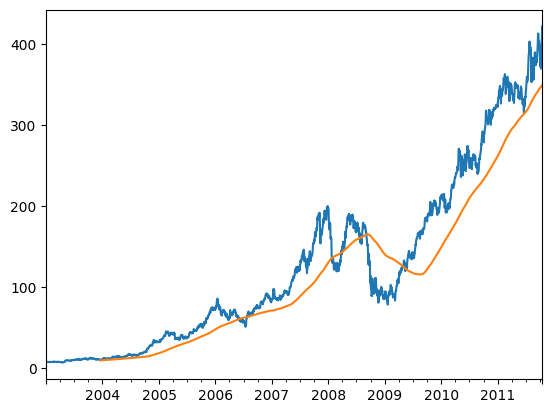

In [277]:
close_px["AAPL"].plot()
close_px["AAPL"].rolling(250).mean().plot()


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
plt.figure()


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [280]:
std250 = close_px["AAPL"].pct_change().rolling(250, min_periods=10).std()


In [281]:
std250[5:12]


2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15         NaN
2003-01-16    0.009628
2003-01-17    0.013818
Freq: B, Name: AAPL, dtype: float64

<Axes: >

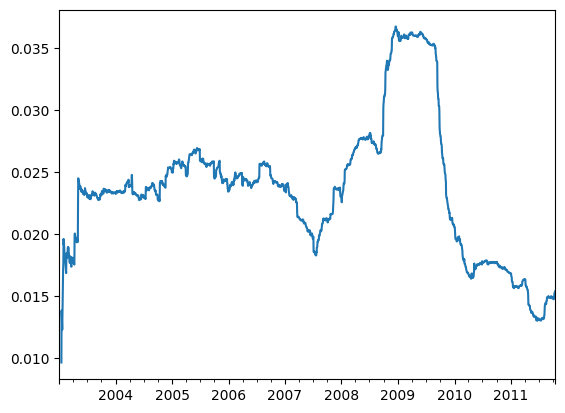

In [ ]:
std250.plot()


In [283]:
expanding_mean = std250.expanding().mean()


In [284]:
plt.style.use("grayscale")


<Axes: >

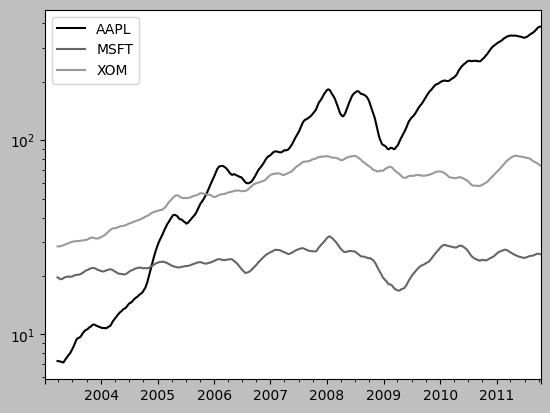

In [285]:
close_px.rolling(60).mean().plot(logy=True)


In [ ]:
close_px.rolling("20D").mean()


,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### Funções exponencialmente ponderadas

In [287]:
aapl_px = close_px["AAPL"]["2006":"2007"]


In [288]:
ma30 = aapl_px.rolling(30, min_periods=20).mean()


In [289]:
ewma30 = aapl_px.ewm(span=30).mean()


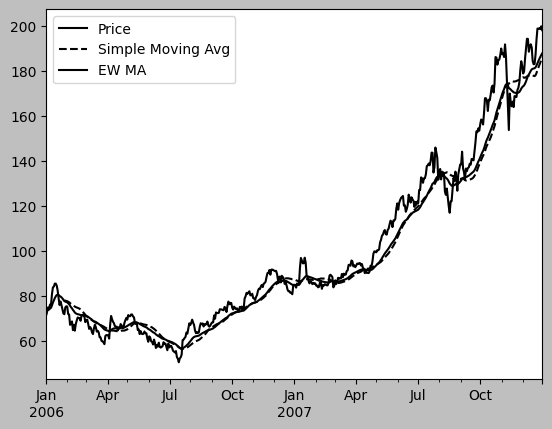

In [295]:
aapl_px.plot(style="k-", label="Price")
ma30.plot(style="k--", label="Simple Moving Avg")
ewma30.plot(style="k-", label="EW MA")
plt.legend();


### Funções de janela móvel binárias


In [296]:
spx_px = close_px_all["SPX"]


In [ ]:
spx_rets = spx_px.pct_change()


In [ ]:
returns = close_px.pct_change()


In [299]:
corr = returns["AAPL"].rolling(125, min_periods=100).corr(spx_rets)


<Axes: >

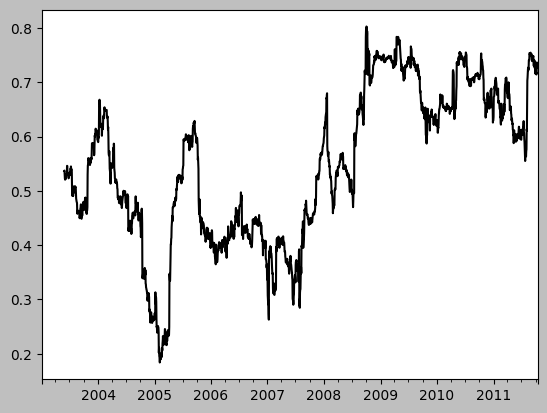

In [ ]:
corr.plot()


In [301]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)


<Axes: >

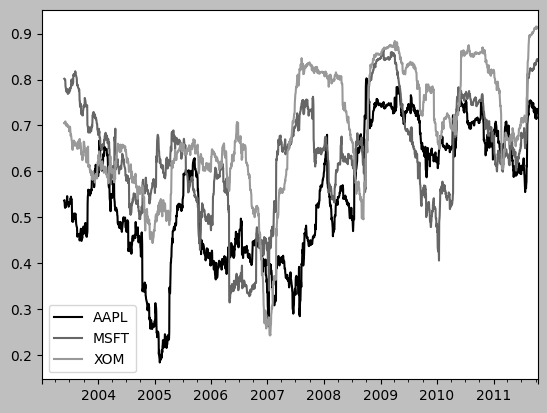

In [ ]:
corr.plot()


### Funções de janela móvel definidas pelo usuário

In [303]:
from scipy.stats import percentileofscore


In [304]:
def score_at_2percent(x):
    return percentileofscore(x, 0.02)


In [305]:
result = returns["AAPL"].rolling(250).apply(score_at_2percent)


<Axes: >

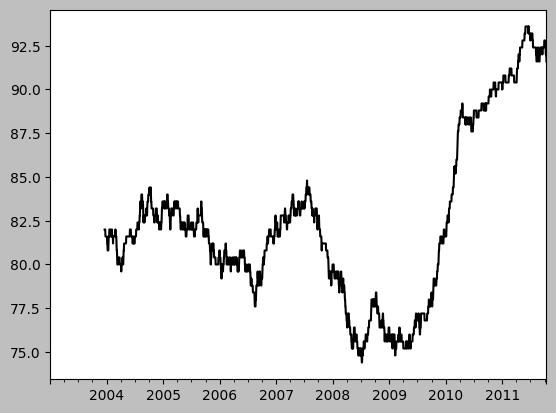

In [ ]:
result.plot()
